# Exploring binary mixtures with GMDPD

Date created: 05/04/20

In all cases, values of the exponents of wrapping functions are $N_{w1}=3, N_{w2}=2$.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# dpdsim needs to be on the Python path
from dpdsim import GMDPDSim
from dpdsim.utils import compute_profile, compute_rdf

## Test 1

$A_1 = -60, A_2 = -40, \Delta A=20$  
$B = 3$

In [17]:
N = 1000
Nstep = 10000
dt = 5e-3
L = [20, 4, 4]
thermo = 200

In [104]:
N1 = int(N//2)
N2 = N - N1

bl = np.r_[np.ones(N1), 2*np.ones(N2)].astype(int)

X1 = np.random.rand(N1, 3) * L
X1[:, 0] *= 0.5
X2 = np.random.rand(N2, 3) * L
X2[:, 0] *= 0.5
X2[:, 0] += L[0]/2
X = np.r_[X1, X2]

A1 = -60.0
A2 = -40.0
dA = 20.0
A12 = (A1 + A2)/2.0 + dA
ip_A = np.zeros((3, 3))
ip_A[1, 1] = A1
ip_A[2, 2] = A2
ip_A[2, 1] = ip_A[1, 2] = A12

ip_B = 3.0

Rd = np.zeros((3, 3))
Rd[1, 1] = 0.60
Rd[2, 2] = 0.75
Rd[2, 1] = Rd[1, 2] = (Rd[1, 1] + Rd[2, 2]) / 2.0

ip_Nw = np.zeros(3)
ip_Nw[1] = 3.0
ip_Nw[2] = 2.0

ip_Nrho = 2.0 * np.ones((3, 3))

In [105]:
sim = GMDPDSim(implementation="fortran", N=N, L=L, dt=dt, steps=Nstep, thermo=thermo)

In [107]:
sim.read_particle_inputs(X, bl, ip_A, ip_B, Rd, ip_Nw, ip_Nrho)

In [108]:
sim.compute_local_density()
sim.compute_pe()

In [110]:
sim.minimise(Nit=10, w=1e-5, thermo=2)

Minimising... Initial PE: 6.705e+04
step time pe
2 1 5.312e+03
4 3 -1.021e+03
6 5 -2.945e+03
8 7 -4.117e+03
10 9 -4.938e+03
Done. Time: 9.31 s


(0, 10)

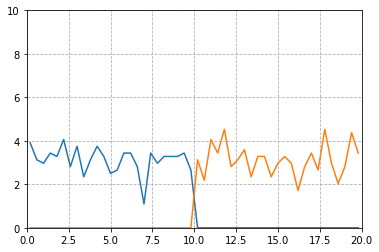

In [111]:
r, pr_1 = compute_profile(sim, 0, 1, N_bins=50)
r, pr_2 = compute_profile(sim, 0, 2, N_bins=50)

plt.plot(r, pr_1)
plt.plot(r, pr_2)
plt.grid(ls="--")
plt.xlim([0, L[0]])
plt.ylim([0, 10])

In [116]:
sim.run()

step time temp ke pe p pxx pyy pzz
100 12 3.05153 4.573e+03 -1.442e+04 -4.994e+00 -3.843e+00 -6.293e+00 -4.844e+00
200 24 2.24118 3.358e+03 -1.693e+04 -5.032e+00 -2.965e+00 -6.355e+00 -5.775e+00
300 35 1.70778 2.559e+03 -1.850e+04 -4.174e+00 -8.552e-01 -5.013e+00 -6.653e+00
400 47 1.58603 2.377e+03 -1.972e+04 -5.530e+00 -1.510e-01 -9.867e+00 -6.571e+00
500 60 1.55979 2.337e+03 -2.070e+04 -3.346e+00 3.572e+00 -8.115e+00 -5.495e+00
600 72 1.36013 2.038e+03 -2.153e+04 -7.214e+00 -3.468e+00 -8.156e+00 -1.002e+01
700 84 1.19771 1.795e+03 -2.181e+04 -2.381e+00 -3.589e-01 -2.839e+00 -3.946e+00
800 97 1.20667 1.808e+03 -2.223e+04 -3.590e+00 -9.921e-01 -4.747e+00 -5.032e+00
900 109 1.15635 1.733e+03 -2.204e+04 -3.240e+00 -3.234e-01 -5.610e+00 -3.787e+00
1000 121 1.15337 1.728e+03 -2.247e+04 -3.925e+00 -1.983e+00 -4.917e+00 -4.875e+00
1100 134 1.20491 1.806e+03 -2.242e+04 -1.817e+00 3.374e-01 -3.762e+00 -2.026e+00
1200 150 1.13341 1.698e+03 -2.253e+04 -4.624e+00 -1.153e+00 -6.993e+00 -5.726e+00


In [131]:
# avg temperature
sim.T[-1000:].mean().round(3)

1.113

Time: 0.15 s
Time: 0.14 s


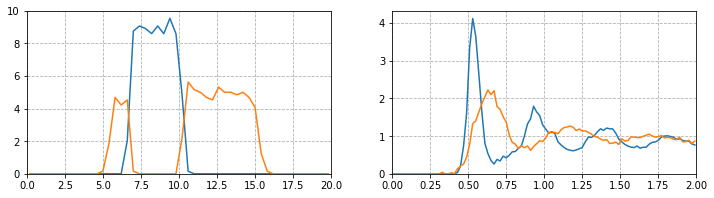

In [188]:
r_pr, pr_1 = compute_profile(sim, 0, 1, N_bins=50, shift=[2, 0, 0])
r_pr, pr_2 = compute_profile(sim, 0, 2, N_bins=50, shift=[2, 0, 0])

r_rdf, rdf_1 = compute_rdf(sim, 1, N_bins=100)
r_rdf, rdf_2 = compute_rdf(sim, 2, N_bins=100)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].plot(r_pr, pr_1, r_pr, pr_2)
ax[0].grid(ls="--")
ax[0].set_xlim([0, L[0]])
ax[0].set_ylim([0, 10])

ax[1].plot(r_rdf, rdf_1/5, r_rdf, rdf_2/2.5)
ax[1].grid(ls="--")
ax[1].set_xlim([0, L[1]/2])
ax[1].set_ylim(bottom=0);

## 2nd test

Stronger attraction $A_1$ of one component to reach the solid phase.

In [134]:
N = 1000
Nstep = 10000
dt = 5e-3
L = [20, 4, 4]
thermo = 200

In [135]:
N1 = int(N//2)
N2 = N - N1

X1 = np.random.rand(N1, 3) * L
X1[:, 0] *= 0.5
X2 = np.random.rand(N2, 3) * L
X2[:, 0] *= 0.5
X2[:, 0] += L[0]/2
X = np.r_[X1, X2]

bl = np.r_[np.ones(N1), 2*np.ones(N2)].astype(int)

A1 = -70.0
A2 = -40.0
dA = 30.0
A12 = (A1 + A2)/2.0 + dA
ip_A = np.zeros((3, 3))
ip_A[1, 1] = A1
ip_A[2, 2] = A2
ip_A[2, 1] = ip_A[1, 2] = A12

ip_B = 3.0

Rd = np.zeros((3, 3))
Rd[1, 1] = 0.60
Rd[2, 2] = 0.75
Rd[2, 1] = Rd[1, 2] = (Rd[1, 1] + Rd[2, 2]) / 2.0

ip_Nw = np.zeros(3)
ip_Nw[1] = 3.0
ip_Nw[2] = 2.0

ip_Nrho = 2.0 * np.ones((3, 3))

In [136]:
sim_2 = GMDPDSim(implementation="fortran", N=N, L=L, dt=dt, steps=Nstep, thermo=thermo)
sim_2.read_particle_inputs(X, bl, ip_A, ip_B, Rd, ip_Nw, ip_Nrho)

In [138]:
sim_2.minimise(Nit=10, w=1e-5, thermo=2)

Minimising... Initial PE: 6.557e+04
step time pe
2 1 4.000e+03
4 3 -2.308e+03
6 5 -4.221e+03
8 7 -5.387e+03
10 9 -6.204e+03
Done. Time: 9.09 s


In [139]:
sim_2.Rd

array([[0.   , 0.   , 0.   ],
       [0.   , 0.6  , 0.675],
       [0.   , 0.675, 0.75 ]])

In [140]:
sim_2.run()

step time temp ke pe p pxx pyy pzz
200 24 2.31216 3.465e+03 -2.004e+04 -8.036e+00 -5.550e+00 -1.067e+01 -7.883e+00
400 48 1.83785 2.754e+03 -2.346e+04 -5.471e-01 6.306e+00 -4.556e+00 -3.392e+00
600 71 1.25813 1.885e+03 -2.545e+04 -7.320e+00 -3.674e+00 -8.232e+00 -1.005e+01
800 95 1.19066 1.784e+03 -2.609e+04 -5.201e+00 7.836e-02 -7.068e+00 -8.612e+00
1000 118 1.16525 1.746e+03 -2.628e+04 -1.759e+00 1.881e+00 -2.775e+00 -4.384e+00
1200 142 1.15588 1.732e+03 -2.634e+04 -3.971e+00 1.230e+00 -1.009e+01 -3.050e+00
1400 166 1.07522 1.611e+03 -2.654e+04 -6.611e+00 -3.005e-01 -8.940e+00 -1.059e+01
1600 190 1.08552 1.627e+03 -2.660e+04 -4.647e+00 -6.596e-01 -6.171e+00 -7.109e+00
1800 214 1.08783 1.630e+03 -2.670e+04 -7.324e+00 -4.432e+00 -9.396e+00 -8.145e+00
2000 238 1.05316 1.578e+03 -2.656e+04 -9.524e-01 3.302e+00 -2.377e+00 -3.783e+00
2200 262 1.05088 1.575e+03 -2.653e+04 -2.397e+00 3.267e-01 -3.336e+00 -4.182e+00
2400 286 1.08728 1.629e+03 -2.666e+04 -2.278e+00 1.559e+00 -2.596e+00 -5.798e

In [141]:
# settled temperature
sim_2.T[-1000:].mean().round(3)

1.084

Time: 0.15 s
Time: 0.14 s


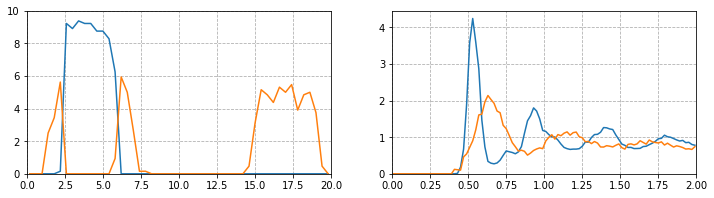

In [189]:
r_pr, pr_1 = compute_profile(sim_2, 0, 1, N_bins=50, shift=[0, 0, 0])
r_pr, pr_2 = compute_profile(sim_2, 0, 2, N_bins=50, shift=[0, 0, 0])

r_rdf, rdf_1 = compute_rdf(sim_2, 1, N_bins=100)
r_rdf, rdf_2 = compute_rdf(sim_2, 2, N_bins=100)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].plot(r_pr, pr_1, r_pr, pr_2)
ax[0].grid(ls="--")
ax[0].set_xlim([0, L[0]])
ax[0].set_ylim([0, 10])

ax[1].plot(r_rdf, rdf_1/5, r_rdf, rdf_2/2.5)
ax[1].grid(ls="--")
ax[1].set_xlim([0, L[1]/2])
ax[1].set_ylim(bottom=0);

## Test 3:

Same $A=-40$ for both components.  
$B=3$.  
Lower $r_d$ for one component.

In [86]:
N = 1000
Nstep = 10000
dt = 5e-3
L = [20, 4, 4]
thermo = 200

In [87]:
N1 = int(N//2)
N2 = N - N1

X1 = np.random.rand(N1, 3) * L
X1[:, 0] *= 0.5
X2 = np.random.rand(N2, 3) * L
X2[:, 0] *= 0.5
X2[:, 0] += L[0]/2
X = np.r_[X1, X2]

bl = np.r_[np.ones(N1), 2*np.ones(N2)].astype(int)

A1 = -40.0
A2 = -40.0
dA = 30.0
A12 = (A1 + A2)/2.0 + dA
ip_A = np.zeros((3, 3))
ip_A[1, 1] = A1
ip_A[2, 2] = A2
ip_A[2, 1] = ip_A[1, 2] = A12

ip_B = 3.0

Rd = np.zeros((3, 3))
Rd[1, 1] = 0.75
Rd[2, 2] = 0.55
Rd[2, 1] = Rd[1, 2] = (Rd[1, 1] + Rd[2, 2]) / 2.0

ip_Nw = np.zeros(3)
ip_Nw[1] = 3.0
ip_Nw[2] = 2.0

ip_Nrho = 2.0 * np.ones((3, 3))

In [88]:
sim_3 = GMDPDSim(implementation="fortran", N=N, L=L, dt=dt, steps=Nstep, thermo=thermo)
sim_3.read_particle_inputs(X, bl, ip_A, ip_B, Rd, ip_Nw, ip_Nrho)

In [89]:
sim_3.minimise(Nit=10, w=1e-5, thermo=2)

Minimising... Initial PE: 4.053e+04
step time pe
2 1 1.596e+04
4 3 7.019e+03
6 5 3.010e+03
8 7 6.422e+02
10 9 -9.438e+02
Done. Time: 9.15 s


In [90]:
sim_3.run()

step time temp ke pe p pxx pyy pzz
200 23 2.23372 3.347e+03 -1.398e+04 -3.208e+00 -8.692e-01 -2.875e+00 -5.881e+00
400 47 1.52951 2.292e+03 -1.659e+04 -3.149e+00 2.599e+00 -3.963e+00 -8.083e+00
600 71 1.28434 1.925e+03 -1.813e+04 -4.775e+00 -9.562e-01 -7.973e+00 -5.396e+00
800 94 1.13880 1.706e+03 -1.890e+04 -3.020e+00 6.338e-01 -4.026e+00 -5.668e+00
1000 118 1.12563 1.687e+03 -1.916e+04 -2.913e+00 5.371e-01 -4.292e+00 -4.984e+00
1200 141 1.16496 1.746e+03 -1.950e+04 -5.053e+00 -1.739e-01 -1.001e+01 -4.971e+00
1400 165 1.15342 1.728e+03 -1.962e+04 -4.522e+00 -1.976e-01 -7.944e+00 -5.425e+00
1600 189 1.03698 1.554e+03 -1.963e+04 -4.238e+00 -1.302e+00 -4.291e+00 -7.122e+00
1800 212 1.06443 1.595e+03 -1.977e+04 -5.397e+00 -2.929e+00 -7.641e+00 -5.620e+00
2000 236 1.12537 1.686e+03 -1.980e+04 -4.727e+00 -2.262e+00 -7.582e+00 -4.336e+00
2200 260 1.10127 1.650e+03 -1.960e+04 -3.836e+00 -1.492e+00 -5.675e+00 -4.343e+00
2400 283 1.06711 1.599e+03 -1.979e+04 -3.247e+00 2.108e-01 -6.610e+00 -3.3

In [129]:
# final temperature
sim_3.T[-1000:].mean().round(3)

1.086

Time: 0.15 s
Time: 0.14 s


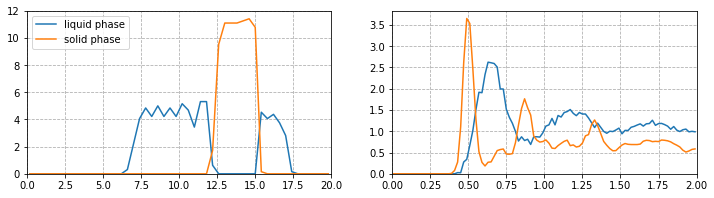

In [190]:
r_pr, pr_1 = compute_profile(sim_3, 0, 1, N_bins=50, shift=[0, 0, 0])
r_pr, pr_2 = compute_profile(sim_3, 0, 2, N_bins=50, shift=[0, 0, 0])

r_rdf, rdf_1 = compute_rdf(sim_3, 1, N_bins=100)
r_rdf, rdf_2 = compute_rdf(sim_3, 2, N_bins=100)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].plot(r_pr, pr_1, label="liquid phase")
ax[0].plot(r_pr, pr_2, label="solid phase")
ax[0].grid(ls="--")
ax[0].set_xlim([0, L[0]])
ax[0].set_ylim([0, 12])
ax[0].legend()

ax[1].plot(r_rdf, rdf_1/2, r_rdf, rdf_2/7)
ax[1].grid(ls="--")
ax[1].set_xlim([0, L[1]/2])
ax[1].set_ylim(bottom=0);

## Test 4: $B=2$

In [143]:
N = 1000
Nstep = 10000
dt = 5e-3
L = [20, 4, 4]
thermo = 200

In [160]:
N1 = int(N//2)
N2 = N - N1

X1 = np.random.rand(N1, 3) * L
X1[:, 0] *= 0.5
X2 = np.random.rand(N2, 3) * L
X2[:, 0] *= 0.5
X2[:, 0] += L[0]/2
X = np.r_[X1, X2]

bl = np.r_[np.ones(N1), 2*np.ones(N2)].astype(int)

A1 = -40.0
A2 = -40.0
dA = 20.0
A12 = (A1 + A2)/2.0 + dA
ip_A = np.zeros((3, 3))
ip_A[1, 1] = A1
ip_A[2, 2] = A2
ip_A[2, 1] = ip_A[1, 2] = A12

ip_B = 2.0

Rd = np.zeros((3, 3))
Rd[1, 1] = 0.55
Rd[2, 2] = 0.75
Rd[2, 1] = Rd[1, 2] = (Rd[1, 1] + Rd[2, 2]) / 2.0

ip_Nw = np.zeros(3)
ip_Nw[1] = 3.0
ip_Nw[2] = 2.0

ip_Nrho = 2.0 * np.ones((3, 3))

In [161]:
sim_4 = GMDPDSim(implementation="fortran", N=N, L=L, dt=dt, steps=Nstep, thermo=thermo)
sim_4.read_particle_inputs(X, bl, ip_A, ip_B, Rd, ip_Nw, ip_Nrho)

In [162]:
sim_4.minimise(Nit=10, w=1e-5, thermo=2)

Minimising... Initial PE: 5.806e+04
step time pe
2 1 1.606e+03
4 3 -3.081e+03
6 5 -4.161e+03
8 7 -4.803e+03
10 9 -5.249e+03
Done. Time: 9.21 s


In [163]:
sim_4.run()

step time temp ke pe p pxx pyy pzz
200 23 1.86529 2.795e+03 -1.474e+04 -5.890e+00 -7.789e+00 -4.813e+00 -5.068e+00
400 47 1.37518 2.061e+03 -1.719e+04 -4.196e+00 -3.415e+00 -5.577e+00 -3.595e+00
600 70 1.27004 1.903e+03 -1.821e+04 -3.894e+00 -3.058e-01 -5.918e+00 -5.456e+00
800 94 1.31357 1.968e+03 -1.906e+04 -2.241e+00 1.208e+00 -3.513e+00 -4.418e+00
1000 117 1.11667 1.673e+03 -1.994e+04 -3.995e+00 -1.652e+00 -6.039e+00 -4.294e+00
1200 141 1.20091 1.800e+03 -2.064e+04 -5.202e+00 -1.595e+00 -6.263e+00 -7.748e+00
1400 165 1.06900 1.602e+03 -2.069e+04 -3.408e+00 -7.390e-01 -4.595e+00 -4.890e+00
1600 189 1.05661 1.583e+03 -2.089e+04 -1.359e-01 3.534e+00 -4.884e-01 -3.453e+00
1800 213 1.07611 1.613e+03 -2.100e+04 -4.090e-01 2.385e+00 -1.370e+00 -2.241e+00
2000 237 1.10004 1.648e+03 -2.091e+04 -6.456e+00 -1.996e+00 -8.727e+00 -8.646e+00
2200 261 1.08462 1.625e+03 -2.104e+04 -3.647e-01 1.202e+00 -6.311e-01 -1.666e+00
2400 284 1.06279 1.593e+03 -2.086e+04 -5.142e-01 1.453e+00 2.276e-01 -3.223

In [164]:
sim_4.T[-1000:].mean().round(3)

1.062

Time: 0.15 s
Time: 0.14 s


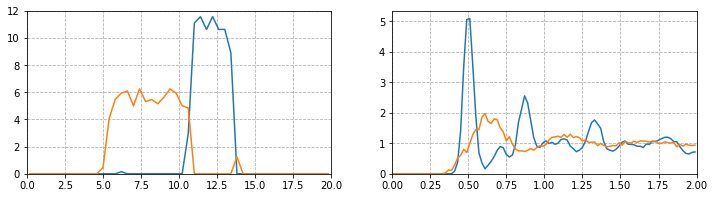

In [191]:
r_pr, pr_1 = compute_profile(sim_4, 0, 1, N_bins=50, shift=[10, 0, 0])
r_pr, pr_2 = compute_profile(sim_4, 0, 2, N_bins=50, shift=[10, 0, 0])

r_rdf, rdf_1 = compute_rdf(sim_4, 1, N_bins=100)
r_rdf, rdf_2 = compute_rdf(sim_4, 2, N_bins=100)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].plot(r_pr, pr_1, r_pr, pr_2)
ax[0].grid(ls="--")
ax[0].set_xlim([0, L[0]])
ax[0].set_ylim([0, 12])

ax[1].plot(r_rdf, rdf_1/5, r_rdf, rdf_2/3)
ax[1].grid(ls="--")
ax[1].set_xlim([0, L[1]/2])
ax[1].set_ylim(bottom=0);

## Test 5: $B=2$, stronger solid attraction via $A$

In [171]:
N = 1000
Nstep = 10000
dt = 5e-3
L = [20, 4, 4]
thermo = 200

In [172]:
N1 = int(N//2)
N2 = N - N1

X1 = np.random.rand(N1, 3) * L
X1[:, 0] *= 0.5
X2 = np.random.rand(N2, 3) * L
X2[:, 0] *= 0.5
X2[:, 0] += L[0]/2
X = np.r_[X1, X2]

bl = np.r_[np.ones(N1), 2*np.ones(N2)].astype(int)

A1 = -60.0
A2 = -40.0
dA = 20.0
A12 = (A1 + A2)/2.0 + dA
ip_A = np.zeros((3, 3))
ip_A[1, 1] = A1
ip_A[2, 2] = A2
ip_A[2, 1] = ip_A[1, 2] = A12

ip_B = 2.0

Rd = np.zeros((3, 3))
Rd[1, 1] = 0.55
Rd[2, 2] = 0.75
Rd[2, 1] = Rd[1, 2] = (Rd[1, 1] + Rd[2, 2]) / 2.0

ip_Nw = np.zeros(3)
ip_Nw[1] = 3.0
ip_Nw[2] = 2.0

ip_Nrho = 2.0 * np.ones((3, 3))

In [173]:
sim_5 = GMDPDSim(implementation="fortran", N=N, L=L, dt=dt, steps=Nstep, thermo=thermo)
sim_5.read_particle_inputs(X, bl, ip_A, ip_B, Rd, ip_Nw, ip_Nrho)

In [174]:
sim_5.minimise(Nit=10, w=1e-5, thermo=2)

Minimising... Initial PE: 5.494e+04
step time pe
2 1 -1.212e+03
4 3 -5.861e+03
6 6 -6.927e+03
8 7 -7.562e+03
10 9 -8.004e+03
Done. Time: 9.96 s


In [175]:
sim_5.run()

step time temp ke pe p pxx pyy pzz
200 24 2.29024 3.432e+03 -2.238e+04 -2.458e+00 -4.676e+00 -4.101e+00 1.402e+00
400 47 1.53763 2.304e+03 -2.521e+04 -8.329e+00 -6.964e+00 -1.196e+01 -6.064e+00
600 71 1.44850 2.171e+03 -2.642e+04 -6.884e-01 3.537e+00 -4.989e+00 -6.133e-01
800 94 1.27027 1.903e+03 -2.773e+04 -4.981e+00 -1.005e+00 -8.395e+00 -5.542e+00
1000 118 1.24781 1.870e+03 -2.833e+04 -5.142e+00 -2.220e-01 -7.236e+00 -7.968e+00
1200 142 1.18671 1.778e+03 -2.875e+04 -3.475e+00 -9.079e-01 -3.799e+00 -5.717e+00
1400 166 1.26879 1.901e+03 -2.922e+04 -2.782e+00 4.070e-01 -4.553e+00 -4.202e+00
1600 190 1.11723 1.674e+03 -2.953e+04 -5.691e+00 -9.987e-01 -7.707e+00 -8.368e+00
1800 214 1.13363 1.699e+03 -2.959e+04 -4.384e+00 -4.964e-01 -7.109e+00 -5.548e+00
2000 238 1.13955 1.708e+03 -2.974e+04 -6.154e-01 5.065e+00 -3.245e+00 -3.667e+00
2200 265 1.16259 1.742e+03 -2.997e+04 -3.782e+00 1.076e+00 -6.385e+00 -6.036e+00
2400 290 1.09415 1.640e+03 -3.003e+04 -8.461e+00 -4.948e+00 -1.190e+01 -8.53

In [180]:
sim_5.T[-1000:].mean().round(3)

1.112

Time: 0.15 s
Time: 0.14 s


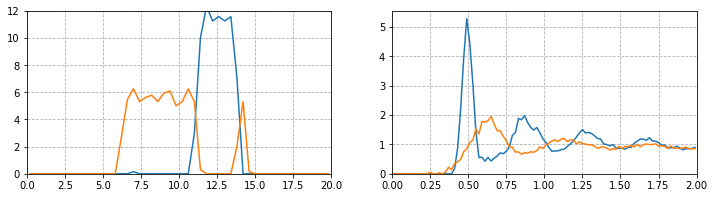

In [192]:
r_pr, pr_1 = compute_profile(sim_5, 0, 1, N_bins=50, shift=[10, 0, 0])
r_pr, pr_2 = compute_profile(sim_5, 0, 2, N_bins=50, shift=[10, 0, 0])

r_rdf, rdf_1 = compute_rdf(sim_5, 1, N_bins=100)
r_rdf, rdf_2 = compute_rdf(sim_5, 2, N_bins=100)

fig, ax = plt.subplots(1, 2, figsize=(12, 3))

ax[0].plot(r_pr, pr_1, r_pr, pr_2)
ax[0].grid(ls="--")
ax[0].set_xlim([0, L[0]])
ax[0].set_ylim([0, 12])

ax[1].plot(r_rdf, rdf_1/5, r_rdf, rdf_2/3)
ax[1].grid(ls="--")
ax[1].set_xlim([0, L[1]/2])
ax[1].set_ylim(bottom=0);